Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [275]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [14]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [280]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# train_path = '/Users/vivektrivedi/Desktop/AIML PGP/DL/CNN/Assignment/Train'
train_path = '../Train'
test_path = '../Test'
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [281]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [278]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [282]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels='inferred',
                                                              image_size=(img_height,img_width),seed=123,batch_size=batch_size,
                                                              validation_split=0.2,subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [284]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                              image_size=(img_height,img_width),
                                                             seed=123,batch_size=batch_size,
                                                              validation_split=0.2,subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [285]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

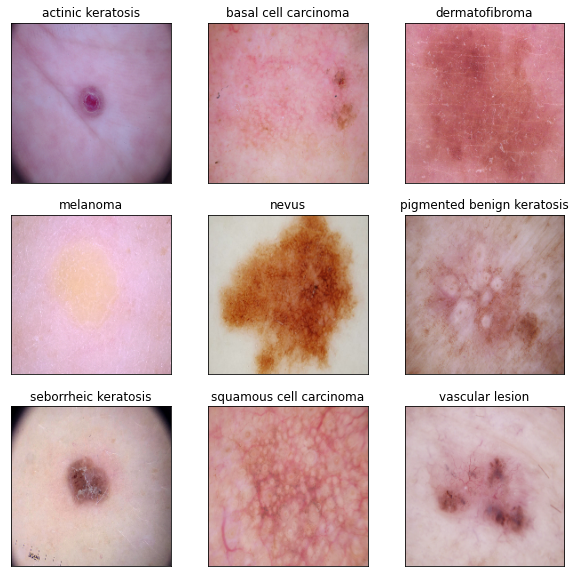

In [187]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
fig = plt.figure(figsize=(10,10))
for imgs,lbls in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1,xticks=[],yticks=[])
        plt.imshow(imgs[i].numpy().astype("uint8"))
        plt.title(class_names[i])

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [286]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [189]:
### Your code goes here
model = Sequential()

 # adding a layer for rescaling the input

model.add(tf.keras.layers.Rescaling(1./255))

 # Adding first convolution layer with 32 kernel of shape 3*3 and activation function used will be relu
model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
# Adding maxpooling layer of 2*2
model.add(tf.keras.layers.MaxPooling2D())

# Adding second layer with 32 kernels
model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D())

# Flatten the output
model.add(tf.keras.layers.Flatten())
# Adding one last layer before output layer which is 128 neuron fully connected layer
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))
 # Adding output layer
model.add(tf.keras.layers.Dense(len(class_names)))
model.add(tf.keras.layers.Activation('softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [190]:
### Todo, choose an appropirate optimiser and loss function
# We are going to use adam optimiser and loss function as categorical_entropy loss and metric will be accuracy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [192]:
# View the summary of all layers
model.build(input_shape=(None,180,180,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 activation (Activation)     (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 87, 87, 32)        0         
                                                        

### Train the model

In [193]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2022-08-17 16:24:13.630232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - ETA: 0s - loss: 2.1860 - accuracy: 0.2450

2022-08-17 16:24:25.537074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - 14s 123ms/step - loss: 2.1860 - accuracy: 0.2450 - val_loss: 1.7060 - val_accuracy: 0.3937
Epoch 2/20
56/56 [==============================] - 6s 108ms/step - loss: 1.6100 - accuracy: 0.4336 - val_loss: 1.7033 - val_accuracy: 0.4206
Epoch 3/20
56/56 [==============================] - 6s 102ms/step - loss: 1.4941 - accuracy: 0.4738 - val_loss: 1.6113 - val_accuracy: 0.4564
Epoch 4/20
56/56 [==============================] - 5s 96ms/step - loss: 1.3536 - accuracy: 0.5285 - val_loss: 1.5246 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 5s 96ms/step - loss: 1.2412 - accuracy: 0.5720 - val_loss: 1.5305 - val_accuracy: 0.4631
Epoch 6/20
56/56 [==============================] - 5s 96ms/step - loss: 1.1276 - accuracy: 0.6183 - val_loss: 1.5152 - val_accuracy: 0.4586
Epoch 7/20
56/56 [==============================] - 5s 97ms/step - loss: 1.0464 - accuracy: 0.6272 - val_loss: 1.5341 - val_accuracy: 0.5481
Epoch 8/20
56/56 [==

### Visualizing training results

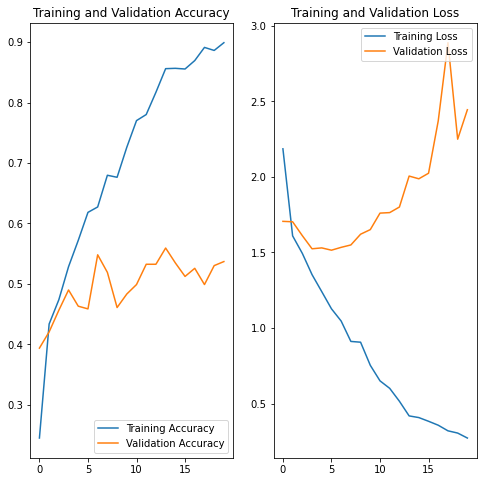

In [195]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Observation:
1. Until epoch 4 training accuracy and validation accuracy both were improving together but after that training accuracy started increasing but validation accuracy didn't change much.
2. Hence after epoch 20 there is a huge gap between train and validation accuracy which signifies that the model is overfitting.
3. After 6 epochs loss for validation set started increasing linearly.

Model is clearly overfitting

### Write your findings here

In [409]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
rotation_range=40, 
width_shift_range=0.2,  
height_shift_range=0.2, 
zoom_range=0.2, 
horizontal_flip=True, 
brightness_range=[0.4, 1.0], 
fill_mode='nearest',validation_split=0.2)

In [350]:
images,labels = next(iter(train_ds))
images = images[:1]
images.shape

TensorShape([1, 180, 180, 3])

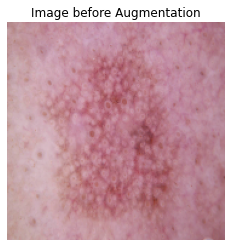

In [351]:
image = images[0]
label = labels[0]
plt.imshow(image.numpy().astype("uint8"))
plt.title('Image before Augmentation')
plt.axis('off')
plt.show()

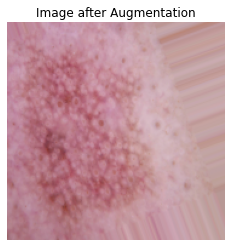

In [359]:
aug_iter = train_datagen.flow(images,batch_size=1)
image1 = next(aug_iter)[0].astype('uint8')
plt.imshow(image1)
plt.title('Image after Augmentation')
plt.axis('off')
plt.show()

In [435]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

train_generator= train_datagen.flow_from_directory(
        '../Train',
        target_size=(180, 180),
        batch_size=32,
        class_mode='sparse',seed = 123,subset='training')

Found 1795 images belonging to 9 classes.


In [436]:
validation_generator= train_datagen.flow_from_directory(
        '../Train',
        target_size=(180, 180),
        batch_size=32,
        class_mode='sparse',seed = 123,subset='validation')

Found 444 images belonging to 9 classes.


### Todo:
### Create the model, compile and train the model


In [430]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential()

model.add(tf.keras.layers.Rescaling(1./255))

 # Adding first convolution layer with 32 kernel of shape 3*3 and activation function used will be relu
model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
# Adding maxpooling layer of 2*2
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

# Adding second layer with 64 kernels
model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

# Adding third layer with 32 kernels
model.add(tf.keras.layers.Conv2D(64,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

# Flatten the output
model.add(tf.keras.layers.Flatten())
# Adding one last layer before output layer which is 128 neuron fully connected layer
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.4))
 # Adding output layer
model.add(tf.keras.layers.Dense(len(class_names)))
model.add(tf.keras.layers.Activation('softmax'))


### Compiling the model

In [437]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [438]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
        train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 20)

Epoch 1/20


2022-08-18 06:58:23.951633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - ETA: 0s - loss: 2.1175 - accuracy: 0.2025

2022-08-18 06:58:44.860998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - 27s 472ms/step - loss: 2.1175 - accuracy: 0.2025 - val_loss: 11.3468 - val_accuracy: 0.2091
Epoch 2/20
56/56 [==============================] - 26s 469ms/step - loss: 2.0576 - accuracy: 0.2053 - val_loss: 10.3174 - val_accuracy: 0.2115
Epoch 3/20
56/56 [==============================] - 26s 467ms/step - loss: 2.0482 - accuracy: 0.2042 - val_loss: 9.9827 - val_accuracy: 0.2139
Epoch 4/20
56/56 [==============================] - 26s 469ms/step - loss: 2.0590 - accuracy: 0.2053 - val_loss: 10.0194 - val_accuracy: 0.2019
Epoch 5/20
56/56 [==============================] - 26s 469ms/step - loss: 2.0705 - accuracy: 0.2019 - val_loss: 8.5424 - val_accuracy: 0.2067
Epoch 6/20
56/56 [==============================] - 26s 468ms/step - loss: 2.0345 - accuracy: 0.2065 - val_loss: 8.8111 - val_accuracy: 0.2091
Epoch 7/20
56/56 [==============================] - 26s 466ms/step - loss: 2.0280 - accuracy: 0.2059 - val_loss: 8.6743 - val_accuracy: 0.1995
Epoch 8

### Visualizing the results

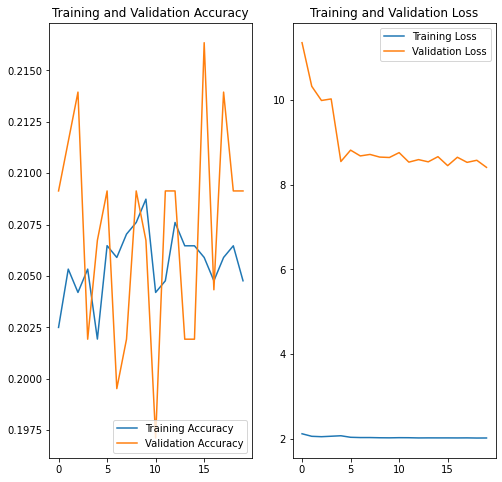

In [441]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Even after using custom augmentation technique model is not giving good results

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

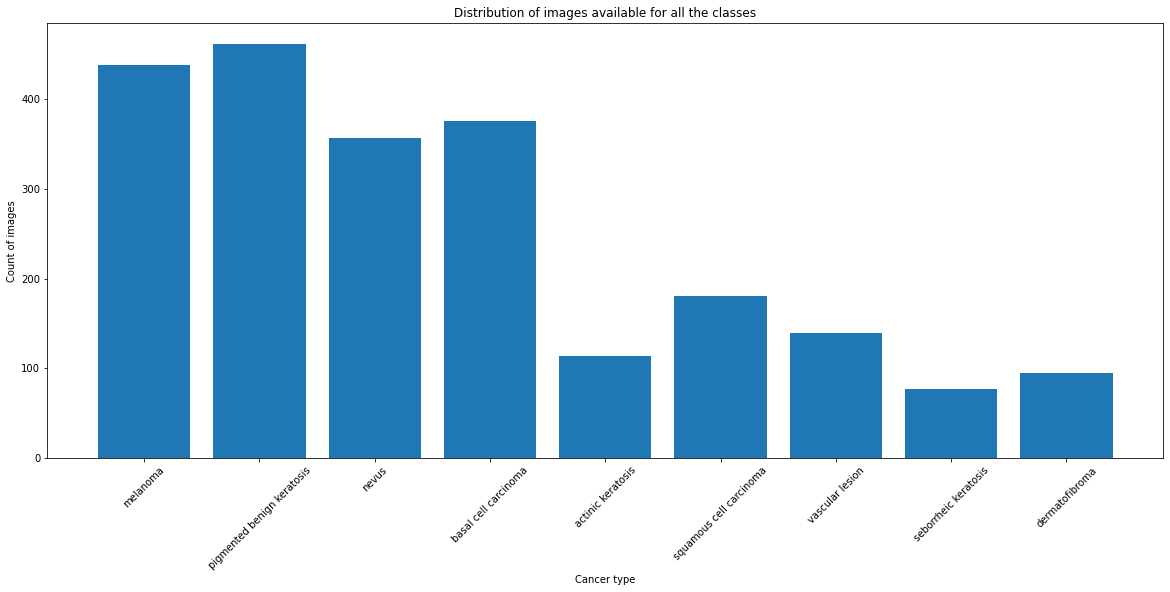

In [209]:
## Your code goes here.
class_dict = {}
for f in data_dir_train.iterdir():
  path = f.name+  '/*.jpg'
  # print('{} - {}'.format(f.name,len(list(data_dir_train.glob(path)))))
  class_dict[f.name] = len(list(data_dir_train.glob(path)))
    
# Here we are plotting the distribution of images available for all the cancer types
# Through this plot we can observe that there is a problem of class imbalance with the data given
plt.figure(figsize=(20,8))
plt.bar(list(class_dict.keys()),list(class_dict.values()))
plt.xlabel('Cancer type')
plt.ylabel('Count of images')
plt.title('Distribution of images available for all the classes')
plt.xticks(rotation = 45)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? -- dermatofibroma and seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples? -- melanoma and pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [210]:
!pip install Augmentor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 8.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=1c389a353d6d3f22f5e2f1ca36347fd8fac4dae1b959ccff87508419913227d1
  Stored in directory: /Users/vivektrivedi/Library/Caches/pip/wheels/2f/a0/d3/4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
Successfully built future


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [256]:
path_to_training_dataset='../Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to ../Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B4ADB820>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to ../Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x166EDC2B0>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to ../Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1664CC4C0>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to ../Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2D6D0D190>: 100%|█


Initialised with 357 image(s) found.
Output directory set to ../Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16682A760>: 100%|█|


Initialised with 462 image(s) found.
Output directory set to ../Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1665A6E80>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to ../Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2D6D45A90>: 100%|█


Initialised with 181 image(s) found.
Output directory set to ../Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2A93054C0>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to ../Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [259]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [260]:
path_list = [x for x in tf.io.gfile.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['../Train/vascular lesion/output/vascular lesion_original_ISIC_0026456.jpg_27c647d0-5709-46aa-aff8-76009b918fe4.jpg',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0027210.jpg_514dae5e-81b4-4f78-94ca-7996af32298d.jpg',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0032545.jpg_aee1818a-e519-490d-99b6-c861acff3292.jpg',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0025244.jpg_0346b923-d20d-438c-9adb-3e75170e8786.jpg',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0025924.jpg_90ca0962-d39a-4689-b9a0-c6541c7501cc.jpg',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0028431.jpg_57be5100-6a1b-4eb2-93b5-5622b104c4e3.jpg',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0034214.jpg_ce0b43ed-b12d-4cdd-b088-a9ef3aa935c5.jpg',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0034214.jpg_6bc45cca-cf79-4f14-b8ce-77b8b9286cdc.jpg',
 '../Train/vascular lesion/output/vascular lesio

In [261]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in tf.io.gfile.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [262]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
dataframe_dict_new

{'../Train/vascular lesion/output/vascular lesion_original_ISIC_0026456.jpg_27c647d0-5709-46aa-aff8-76009b918fe4.jpg': 'melanoma',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0027210.jpg_514dae5e-81b4-4f78-94ca-7996af32298d.jpg': 'melanoma',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0032545.jpg_aee1818a-e519-490d-99b6-c861acff3292.jpg': 'melanoma',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0025244.jpg_0346b923-d20d-438c-9adb-3e75170e8786.jpg': 'melanoma',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0025924.jpg_90ca0962-d39a-4689-b9a0-c6541c7501cc.jpg': 'melanoma',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0028431.jpg_57be5100-6a1b-4eb2-93b5-5622b104c4e3.jpg': 'melanoma',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0034214.jpg_ce0b43ed-b12d-4cdd-b088-a9ef3aa935c5.jpg': 'melanoma',
 '../Train/vascular lesion/output/vascular lesion_original_ISIC_0034214.jpg_6bc45cc

In [263]:
path_list_original = [x for x in tf.io.gfile.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in tf.io.gfile.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list_original, lesion_list_original))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    2239 non-null   object
 1   Label   2239 non-null   object
dtypes: object(2)
memory usage: 35.1+ KB


In [264]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

/var/folders/sn/w_1hcln967q45fbghhv82dhh0000gn/T/ipykernel_3567/390629722.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [265]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    11239 non-null  object
 1   Label   11239 non-null  object
dtypes: object(2)
memory usage: 263.4+ KB


In [266]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [267]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [268]:
data_dir_train='../Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [269]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [270]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential()

model.add(tf.keras.layers.Rescaling(1./255))

 # Adding first convolution layer with 32 kernel of shape 3*3 and activation function used will be relu
model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
# Adding maxpooling layer of 2*2
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

# Adding second layer with 64 kernels
model.add(tf.keras.layers.Conv2D(64,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

# Adding third layer with 32 kernels
model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

# Flatten the output
model.add(tf.keras.layers.Flatten())
# Adding one last layer before output layer which is 128 neuron fully connected layer
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.25))
 # Adding output layer
model.add(tf.keras.layers.Dense(len(class_names)))
model.add(tf.keras.layers.Activation('softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [271]:
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [272]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


2022-08-17 17:14:26.766918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


281/281 [==============================] - ETA: 0s - loss: 2.2703 - accuracy: 0.3157

2022-08-17 17:15:03.021370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


281/281 [==============================] - 41s 141ms/step - loss: 2.2703 - accuracy: 0.3157 - val_loss: 2.7326 - val_accuracy: 0.1340
Epoch 2/30
281/281 [==============================] - 40s 141ms/step - loss: 1.5211 - accuracy: 0.4467 - val_loss: 2.3031 - val_accuracy: 0.3333
Epoch 3/30
281/281 [==============================] - 41s 143ms/step - loss: 1.2985 - accuracy: 0.5127 - val_loss: 1.9059 - val_accuracy: 0.3765
Epoch 4/30
281/281 [==============================] - 41s 146ms/step - loss: 1.1550 - accuracy: 0.5593 - val_loss: 2.8043 - val_accuracy: 0.3396
Epoch 5/30
281/281 [==============================] - 42s 147ms/step - loss: 1.0561 - accuracy: 0.5996 - val_loss: 1.7160 - val_accuracy: 0.4695
Epoch 6/30
281/281 [==============================] - 42s 147ms/step - loss: 0.9335 - accuracy: 0.6526 - val_loss: 2.3403 - val_accuracy: 0.3543
Epoch 7/30
281/281 [==============================] - 42s 147ms/step - loss: 0.7756 - accuracy: 0.7092 - val_loss: 1.1971 - val_accuracy: 0.5

#### **Todo:**  Visualize the model results

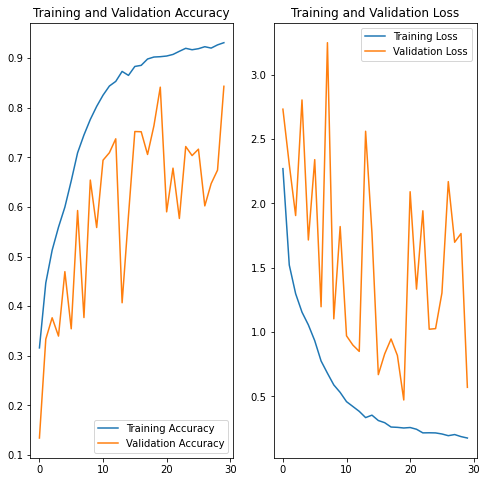

In [273]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Observations:
1. Initially tried by adding 500 samples for each class , after the model was build and ran for 30 epochs the training accuracy was around 0.91 but validation accuracy was incosistent, it was varying near 0.5 to 0.65 which means model was still overfitting.
2. Next tried with 1000 samples of each class, with this also we are unable to conclude that model is not overfitting as even after running for 30 epochs we can see that validation accuracy is still not consistent with training accuracy.